# Mini Project on Employees Data Using PySpark

## Dataset : OfficeDataProject.csv
## Source  : https://github.com/PacktPublishing/50-Hours-of-Big-Data-PySpark-AWS-Scala-and-Scraping/tree/main/Part%203/Code/03-Spark%20DFs

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

## Dataset Insights 
The dataset provided contains details of 1,000 employees across different departments and states in a company. It has seven columns: **employee\_id, employee\_name, department, state, salary, age,** and **bonus.** There are no missing values, ensuring data consistency and completeness, which is an advantage for any analysis. Below are the detailed insights:

### 1. Structure and Uniqueness

The dataset comprises **1,000 rows and 7 columns.** Each employee is uniquely identified by an `employee_id`. While `employee_name` has 939 unique entries, there are a few repeated names, possibly due to either duplicate naming or different employees sharing the same name. Departments are categorized into six unique groups, and employees belong to five different states. This indicates the dataset captures a fairly distributed yet compact workforce spread across multiple regions.

### 2. Departmental Distribution

There are six departments represented in the dataset, with **HR being the largest** department, employing 171 individuals. Other departments such as Marketing, Finance, Accounts, and Purchasing also have significant representation. The spread across departments reflects a balanced organizational structure where no single department is disproportionately dominant, although HR stands out slightly. Such distribution is important to analyze workforce allocation and departmental budgeting.

### 3. State-wise Representation

Employees are located across five states, with **Alaska (AK) being the most represented state** with 209 employees. This suggests either a concentration of company operations in Alaska or the presence of a major office/branch there. California (CA) also has a notable presence, likely due to its role as a business hub. A geographic spread across multiple states indicates regional diversity, which may impact payroll, compliance, and workforce policies.

### 4. Salary Insights

The `salary` variable exhibits a wide range, from a minimum of **1,006** to a maximum of **9,985.** The average salary is approximately **5,330**, with a standard deviation of around **2,603,** reflecting high variation in employee earnings. The median salary of **5,188** is close to the mean, suggesting that the distribution is fairly symmetrical but with some higher outliers. Salaries are aligned with age and department, where senior roles or specific departments may command higher pay.

The interquartile range (IQR) of salaries (3,095 – 7,614) shows that 50% of employees fall within this range, indicating a moderate pay scale across the organization. Outliers with very high salaries may represent top-level executives or highly specialized roles.

### 5. Age Distribution

The workforce has an age range between **20 and 50 years,** with an average age of **35.3 years.** This suggests a predominantly mid-career employee base, balancing both young professionals and experienced staff. The 25th percentile age is 28, while the 75th percentile is 43, indicating that most employees fall in the late-20s to early-40s bracket. A younger workforce may suggest high adaptability, while a balanced mix with experienced staff ensures organizational stability.

### 6. Bonus Patterns

Bonuses range between **500 and 2,000,** with an average bonus of **1,253.** This demonstrates a structured incentive system across employees. The median bonus is 1,245, closely aligned with the mean, indicating fairness and consistency in distribution. The standard deviation of 433 suggests moderate variability, implying performance-based bonuses rather than uniform allocations. Departments with high performers or revenue-generating functions (e.g., Marketing, Finance) may likely enjoy higher bonuses.

### 7. Key Relationships

* **Age vs. Salary:** Older employees are generally expected to earn higher salaries due to experience. Given the dataset’s salary spread, this likely holds true.
* **Department vs. Bonus:** Bonuses may correlate with revenue contribution. For instance, employees in Marketing and Finance might earn higher incentives compared to support functions like HR.
* **State vs. Salary:** Regional cost of living and company branch size might influence salaries. States with higher employee counts, like Alaska and California, could show salary variations.

### 8. Workforce Characteristics

Overall, the company exhibits a diverse workforce in terms of geography, age, and pay structure. The absence of missing data makes this dataset reliable for predictive modeling, HR analytics, and workforce planning. It also highlights organizational priorities, such as a strong HR department and fair bonus allocation.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/khsbh/Desktop/BIG DATA/LAB/OfficeDataProject.csv")
df

,employee_id,employee_name,department,state,salary,age,bonus
0,1000,Nitz Leif,Marketing,CA,6131,26,543
1,1001,Melissia Dedman,Finance,AK,4027,43,1290
2,1002,Rudolph Barringer,HR,LA,3122,43,1445
3,1003,Tamra Amber,Accounts,AK,5717,47,1291
4,1004,Mullan Nitz,Purchasing,CA,5685,34,1394
...,...,...,...,...,...,...,...
995,1995,Dionne Sifford,Sales,WA,6647,35,984
996,1996,Megan Coogan,Sales,NY,8260,33,1938
997,1997,Jacquelyne Barringer,Finance,CA,9899,22,837
998,1998,Casimira Ruzicka,Accounts,NY,2661,43,1128


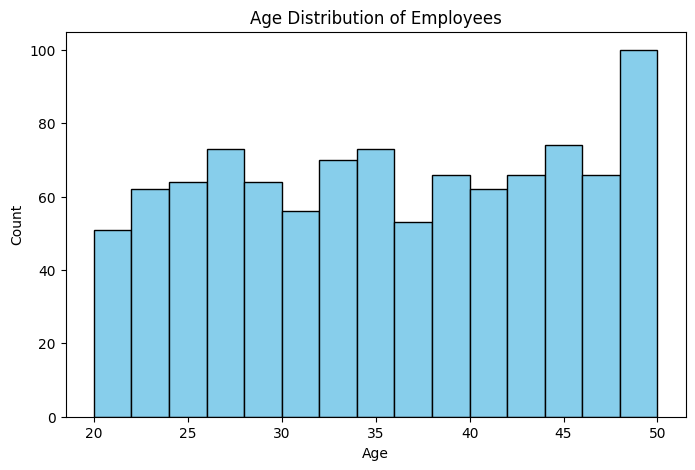

In [27]:
# 1. Age Distribution
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=15, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


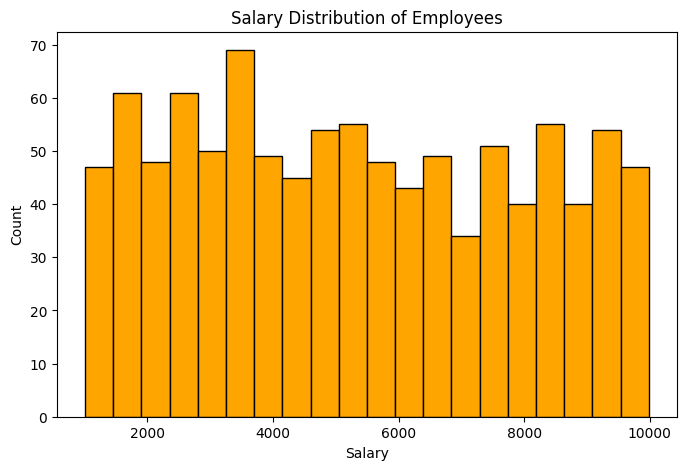

In [28]:
# 2. Salary Distribution
plt.figure(figsize=(8,5))
plt.hist(df['salary'], bins=20, color="orange", edgecolor="black")
plt.title("Salary Distribution of Employees")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


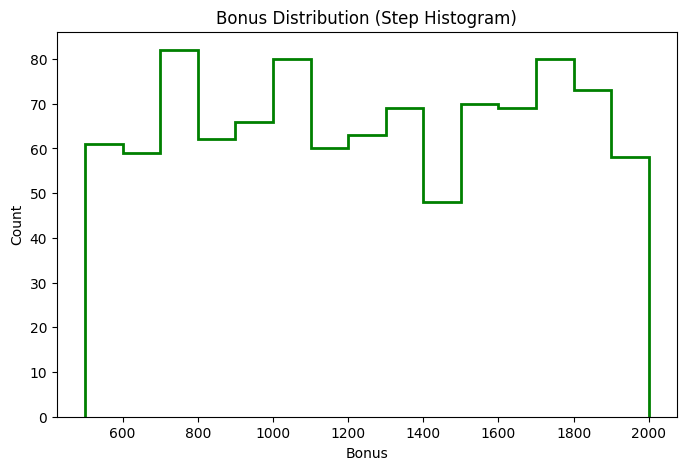

In [29]:
# 3. Bonus Distribution → Step Histogram
plt.figure(figsize=(8,5))
plt.hist(df['bonus'], bins=15, color="green", histtype="step", linewidth=2)
plt.title("Bonus Distribution (Step Histogram)")
plt.xlabel("Bonus")
plt.ylabel("Count")
plt.show()

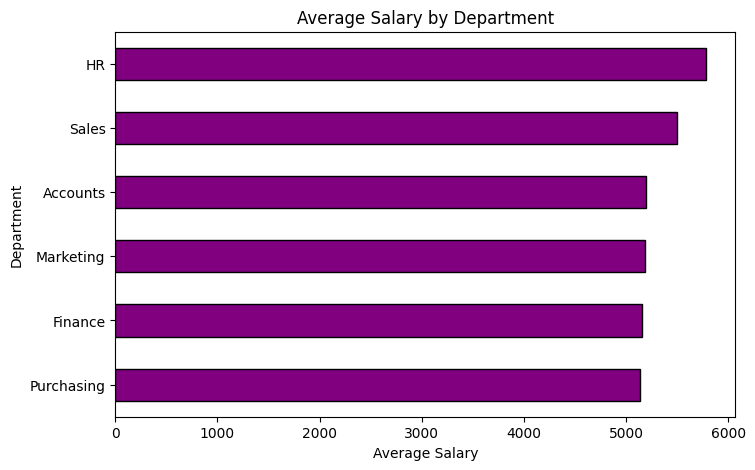

In [30]:
# 4. Average Salary by Department
avg_salary = df.groupby("department")["salary"].mean().sort_values()
plt.figure(figsize=(8,5))
avg_salary.plot(kind="barh", color="purple", edgecolor="black")
plt.title("Average Salary by Department")
plt.xlabel("Average Salary")
plt.ylabel("Department")
plt.show()

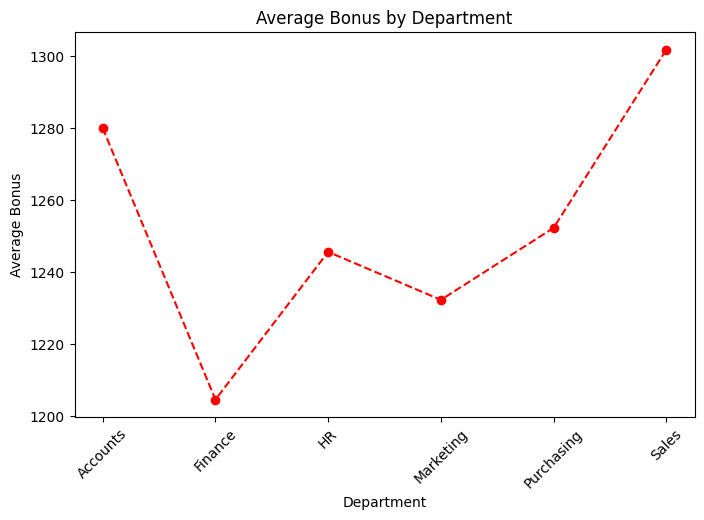

In [31]:
# 5. Average Bonus by Department
avg_bonus = df.groupby("department")["bonus"].mean()
plt.figure(figsize=(8,5))
plt.plot(avg_bonus.index, avg_bonus.values, marker="o", linestyle="--", color="red")
plt.title("Average Bonus by Department")
plt.xlabel("Department")
plt.ylabel("Average Bonus")
plt.xticks(rotation=45)
plt.show()


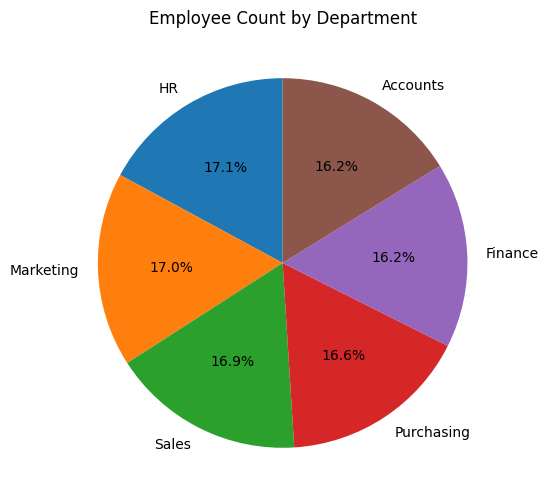

In [32]:
# 6. Employee Count by Department 
dept_count = df["department"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dept_count, labels=dept_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Employee Count by Department")
plt.show()


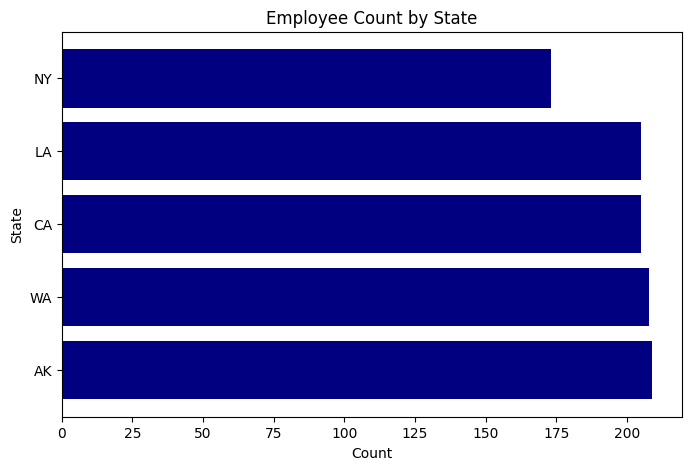

In [33]:
# 7. Employee Count by State
state_count = df["state"].value_counts()
plt.figure(figsize=(8,5))
plt.barh(state_count.index, state_count.values, color="navy")
plt.title("Employee Count by State")
plt.xlabel("Count")
plt.ylabel("State")
plt.show()


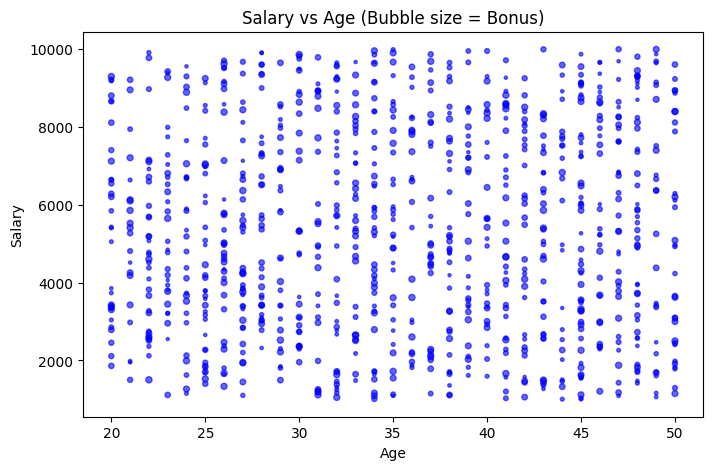

In [34]:
# 8. Salary vs Age
plt.figure(figsize=(8,5))
plt.scatter(df['age'], df['salary'], s=df['bonus']/100, alpha=0.6, c='blue')
plt.title("Salary vs Age (Bubble size = Bonus)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

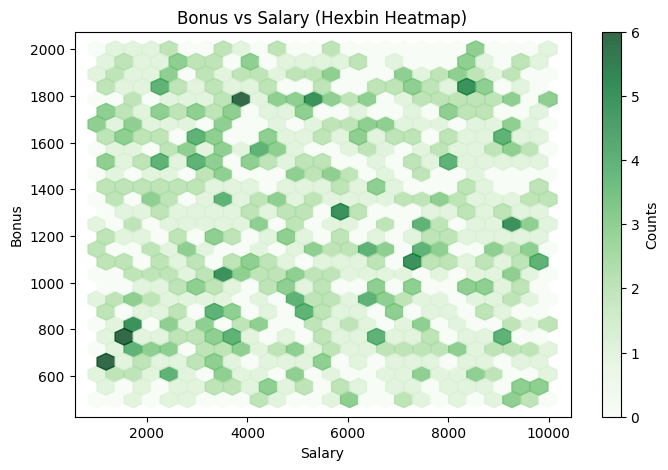

In [36]:
# 9. Bonus vs Salary
plt.figure(figsize=(8,5))
plt.hexbin(df['salary'], df['bonus'], gridsize=25, cmap="Greens", alpha=0.8)
plt.colorbar(label="Counts")
plt.title("Bonus vs Salary (Hexbin Heatmap)")
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()

<Figure size 800x500 with 0 Axes>

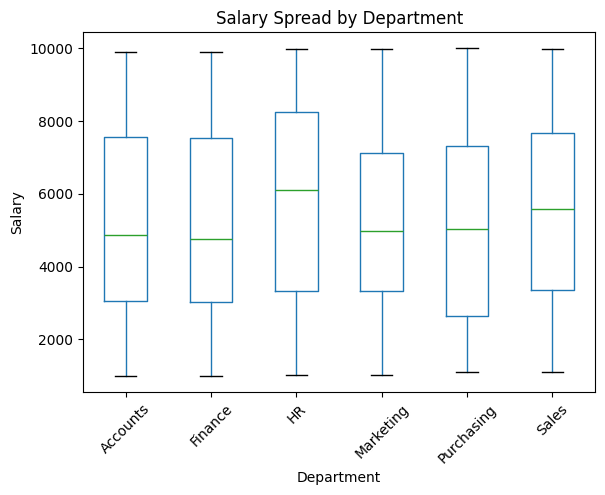

In [37]:
# 10. Salary Spread by Department
plt.figure(figsize=(8,5))
df.boxplot(column="salary", by="department", grid=False, showfliers=False)
plt.title("Salary Spread by Department")
plt.suptitle("")  # remove default title
plt.xlabel("Department")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max

# Start Spark session
spark = SparkSession.builder.appName("OfficeDataProject").getOrCreate()

# Read the CSV file
df = spark.read.option("header", True).option("inferSchema", True).csv("OfficeDataProject.csv")


In [3]:

# ------------------------------
# 1. Total number of employees
# ------------------------------
print("Total number of employees:", df.count())

Total number of employees: 1000


In [4]:
# ------------------------------
# 2. Total number of departments
# ------------------------------
print("Total number of departments:", df.select("department").distinct().count())

Total number of departments: 6


In [5]:
# ------------------------------
# 3. Department names
# ------------------------------
print("Department names:")
df.select("department").distinct().show()

Department names:
+----------+
|department|
+----------+
|     Sales|
|        HR|
|   Finance|
|Purchasing|
| Marketing|
|  Accounts|
+----------+



In [6]:
# ------------------------------
# 4. Total number of employees in each department
# ------------------------------
print("Employees in each department:")
df.groupBy("department").count().show()

Employees in each department:
+----------+-----+
|department|count|
+----------+-----+
|     Sales|  169|
|        HR|  171|
|   Finance|  162|
|Purchasing|  166|
| Marketing|  170|
|  Accounts|  162|
+----------+-----+



In [7]:
# ------------------------------
# 5. Total number of employees in each state
# ------------------------------
print("Employees in each state:")
df.groupBy("state").count().show()

Employees in each state:
+-----+-----+
|state|count|
+-----+-----+
|   LA|  205|
|   CA|  205|
|   WA|  208|
|   NY|  173|
|   AK|  209|
+-----+-----+



In [8]:

# ------------------------------
# 6. Total number of employees in each state in each department
# ------------------------------
print("Employees in each state in each department:")
df.groupBy("state", "department").count().show()

Employees in each state in each department:
+-----+----------+-----+
|state|department|count|
+-----+----------+-----+
|   CA|     Sales|   42|
|   CA| Marketing|   33|
|   NY|  Accounts|   34|
|   NY|     Sales|   27|
|   CA|   Finance|   35|
|   CA|  Accounts|   35|
|   CA|Purchasing|   32|
|   WA|        HR|   47|
|   AK|Purchasing|   30|
|   WA|  Accounts|   27|
|   WA|Purchasing|   38|
|   AK|     Sales|   38|
|   AK|  Accounts|   37|
|   WA| Marketing|   39|
|   LA|        HR|   41|
|   LA|     Sales|   35|
|   AK|        HR|   25|
|   LA|   Finance|   29|
|   AK|   Finance|   37|
|   LA|Purchasing|   45|
+-----+----------+-----+
only showing top 20 rows


In [9]:
# ------------------------------
# 7. Min and Max salaries in each department + sort salaries
# ------------------------------
print("Minimum and maximum salaries in each department:")
df.groupBy("department").agg(min("salary").alias("min_salary"),
                             max("salary").alias("max_salary")).show()

print("Salaries sorted in ascending order:")
df.select("employee_name", "department", "salary").orderBy("salary").show()

Minimum and maximum salaries in each department:
+----------+----------+----------+
|department|min_salary|max_salary|
+----------+----------+----------+
|     Sales|      1103|      9982|
|        HR|      1013|      9982|
|   Finance|      1006|      9899|
|Purchasing|      1105|      9985|
| Marketing|      1031|      9974|
|  Accounts|      1007|      9890|
+----------+----------+----------+

Salaries sorted in ascending order:
+------------------+----------+------+
|     employee_name|department|salary|
+------------------+----------+------+
|   Juliana Kreamer|   Finance|  1006|
|     Tamra Deandre|  Accounts|  1007|
|       Dionne Kall|        HR|  1013|
|  Ruzicka Phylicia|  Accounts|  1029|
|    Lisabeth Luisa| Marketing|  1031|
|      Herder Baros|   Finance|  1053|
|    Gallman Nakano|  Accounts|  1060|
|   Marvis Lisabeth|   Finance|  1062|
| Figueras Yessenia| Marketing|  1093|
|        Hanh Tyree|        HR|  1093|
|Kensinger Antonina|   Finance|  1093|
|    Lonergan Mega

In [10]:
# ------------------------------
# 8. Employees in NY under Finance dept with bonus > avg NY bonus
# ------------------------------
ny_avg_bonus = df.filter(col("state") == "NY").agg(avg("bonus").alias("avg_bonus")).collect()[0]["avg_bonus"]

print("Employees in NY Finance with bonus > average NY bonus:")
df.filter((col("state") == "NY") &
          (col("department") == "Finance") &
          (col("bonus") > ny_avg_bonus)) \
  .select("employee_name", "department", "bonus").show()


Employees in NY Finance with bonus > average NY bonus:
+--------------------+----------+-----+
|       employee_name|department|bonus|
+--------------------+----------+-----+
|       Vivan Sifford|   Finance| 1261|
|      Herder Gallman|   Finance| 1402|
|          Nena Rocha|   Finance| 1647|
|       Leif Lemaster|   Finance| 1782|
|Ellingsworth Meli...|   Finance| 1358|
|        Escoto Gilma|   Finance| 1285|
|     Georgeanna Laub|   Finance| 1679|
|     Durio Tenenbaum|   Finance| 1684|
|       Juliana Grigg|   Finance| 1617|
|        Tiffani Benz|   Finance| 1969|
|          Nitz Ilana|   Finance| 1342|
|   Phylicia Antonina|   Finance| 1857|
|         Durio Janey|   Finance| 1733|
|       Melissia Jere|   Finance| 1533|
|      Yukiko Kreamer|   Finance| 1332|
|      Nena Kensinger|   Finance| 1610|
|      Antonina Ilana|   Finance| 1718|
+--------------------+----------+-----+



In [11]:
# ------------------------------
# 9. Raise salaries by $500 for employees older than 45
# ------------------------------
df_updated = df.withColumn("salary", col("salary") + 
                           (500 * (col("age") > 45).cast("int")))

print("Updated salaries for employees older than 45:")
df_updated.filter(col("age") > 45).select("employee_name", "age", "salary").show()


Updated salaries for employees older than 45:
+------------------+---+------+
|     employee_name|age|salary|
+------------------+---+------+
|       Tamra Amber| 47|  6217|
| Recalde Kensinger| 48|  4204|
|  Barringer Escoto| 49|  2185|
|Vankirk Jacquelyne| 47|  9136|
|   Dionne Lemaster| 48|  5634|
|        Trena Benz| 49|  4876|
|      Dynes Katlyn| 48|  3539|
|      Clune Norene| 49|  2105|
|      Rocha Dionne| 49|  3970|
|       Imai Locust| 49| 10482|
| Clemencia Rudolph| 50|  1796|
|    Zollner Marvis| 50|  4730|
|     Kohn Antonina| 48|  9811|
|     Norene Mayeda| 50|  3600|
|      Jaclyn Baros| 48|  2199|
|    Gallman Nakano| 47|  7313|
|       Luisa Grigg| 48|  9797|
|   Kreamer Shandra| 46|  5468|
|     Fender Coogan| 50|  1651|
|  Lonergan Bergren| 46|  8675|
+------------------+---+------+
only showing top 20 rows


In [20]:
import os
import shutil
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder \
    .appName("OfficeDataProject") \
    .config("spark.hadoop.io.nativeio.enabled", "false") \
    .getOrCreate()

# Load the dataset (point directly to CSV file)
input_path = "C:/Users/khsbh/Desktop/BIG DATA/LAB/OfficeDataProject.csv"
df = spark.read.csv(input_path, header=True, inferSchema=True)

# ------------------------------
# 10. Create DF of employees older than 45 and save to file
# ------------------------------
output_dir = "C:/Users/khsbh/Desktop/BIG DATA/LAB/Employees_Over45_temp"
final_file = "C:/Users/khsbh/Desktop/BIG DATA/LAB/Employees_Age_45.csv"

older_45_df = df.filter(col("age") > 45)

try:
    # Write Spark output to temp folder
    older_45_df.coalesce(1) \
        .write.option("header", True) \
        .mode("overwrite") \
        .csv(output_dir)

    # Find the part file Spark created
    for file in os.listdir(output_dir):
        if file.startswith("part-") and file.endswith(".csv"):
            part_file = os.path.join(output_dir, file)
            # Move and rename to desired file
            shutil.move(part_file, final_file)
            break

    # Clean up temp directory
    shutil.rmtree(output_dir)

    print(f" Saved employees older than 45 into: {final_file}")

except Exception as e:
    print("️ Spark CSV write failed, using Pandas fallback...", e)
    older_45_df.toPandas().to_csv(final_file, index=False)
    print(" Saved employees older than 45 using Pandas fallback.")


 Saved employees older than 45 into: C:/Users/khsbh/Desktop/BIG DATA/LAB/Employees_Age_45.csv


### Conclusion

The dataset paints a picture of a **mid-sized, geographically distributed company with a balanced age structure and fair compensation practices.** Salaries and bonuses show structured variation, ensuring both competitiveness and fairness. With Alaska and HR holding a significant share, further analysis could help determine if this reflects business strategy or operational necessity. The dataset is well-suited for HR analytics, compensation planning, and workforce diversity studies.